<a href="https://colab.research.google.com/github/Sarvesh1814/US-Book-Recommendation-System-/blob/main/EDA%26Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Loading Data

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main = "/content/drive/MyDrive/RS Data/Assignment 3/"

In [ ]:
book = pd.read_csv(main+"Books.csv")
rating = pd.read_csv(main+"Ratings.csv")
users = pd.read_csv(main+"Users.csv")


<ipython-input-4-d51d1b914709>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv(main+"Books.csv")


# Exploratory Data Analysis (Specifically focused on users)

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


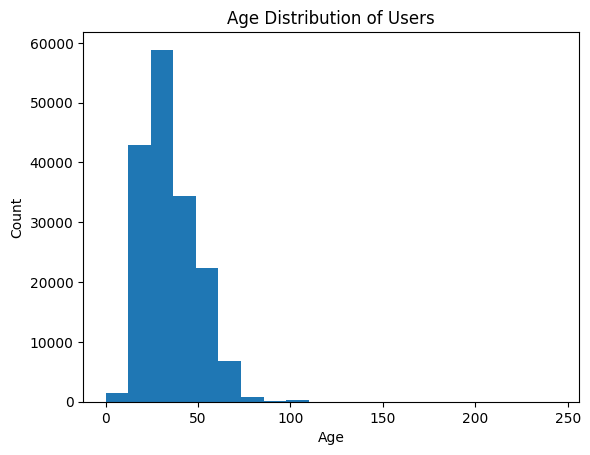

In [ ]:
plt.hist(users['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Users')
plt.show()

**Most of the users in the data lie between age 20-40.**

In [ ]:
# Exctracting Nationality information 
users['country']=''
for i in range(len(users)):
  s = users['Location'].iloc[i].split(",")
  users['country'].iloc[i] = s[-1]

<ipython-input-7-20a2cd689495>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['country'].iloc[i] = s[-1]


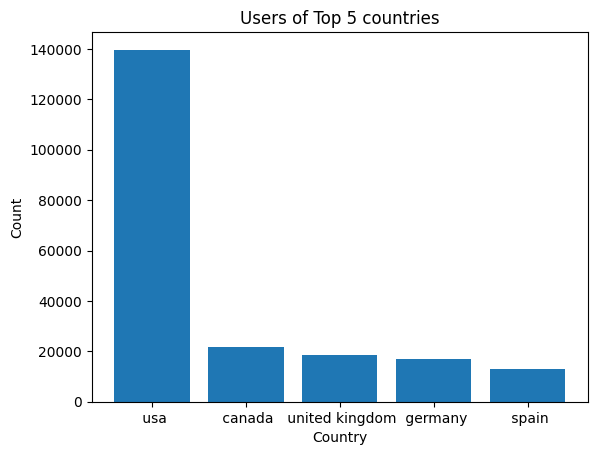

In [ ]:
country_counts = users['country'].value_counts().nlargest(5)

plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Users of Top 5 countries')
plt.show()

**Majority of users belong to USA**

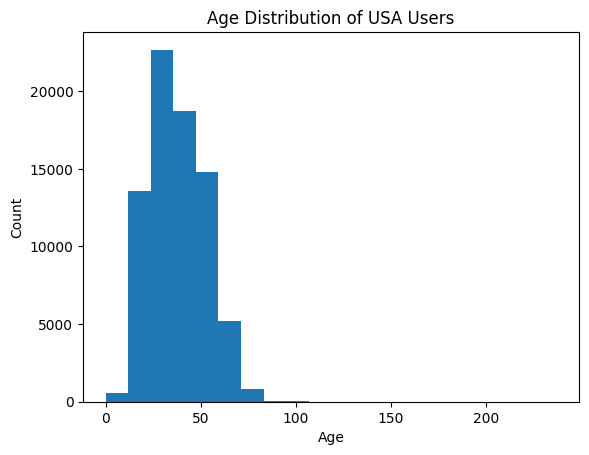

In [ ]:
usa_users = users[users['country'] == ' usa']
plt.hist(usa_users['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of USA Users')
plt.show()

**Same trend of age is being followed in the user of American Nationality**

In [ ]:
usa_users.shape

(139711, 4)

**Based on above statisics and findings for this recommendation system we are going to include users who belong to USA.**

There are total 139711 users that satisfies the above criteria.

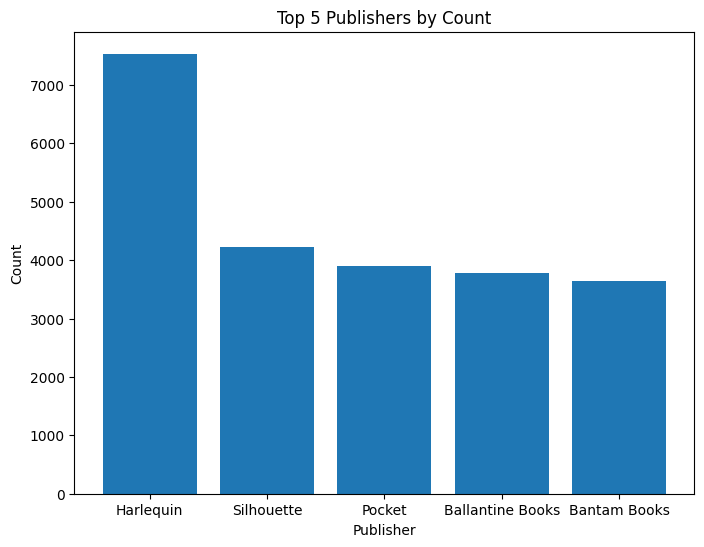

In [ ]:
publisher_counts = book['Publisher'].value_counts()
top_publishers = publisher_counts.head(5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_publishers.index, top_publishers.values)
ax.set_xlabel('Publisher')
ax.set_ylabel('Count')
ax.set_title('Top 5 Publishers by Count')
plt.show()

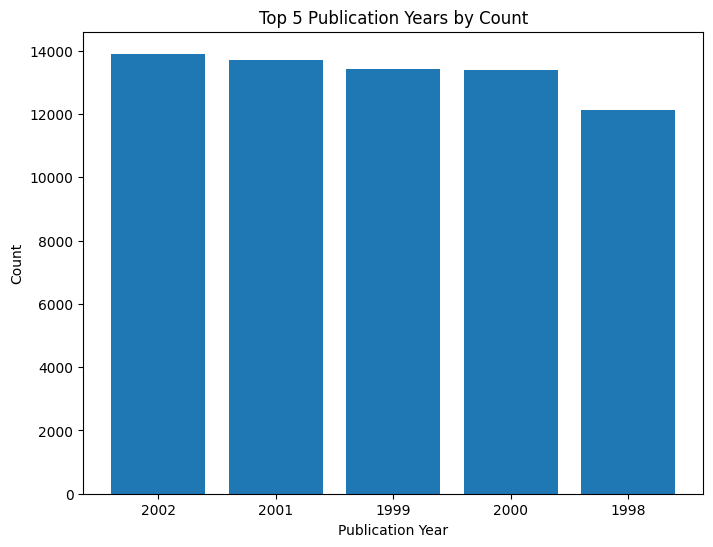

In [ ]:
year_counts = book['Year-Of-Publication'].value_counts()

# get the top 5 publication years by count
top_years = year_counts.head(5)

# create a bar chart of the top 5 publication years
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_years.index.astype(str), top_years.values)
ax.set_xlabel('Publication Year')
ax.set_ylabel('Count')
ax.set_title('Top 5 Publication Years by Count')
plt.show()

**Most of the books in the catalouge are published in the year 2002.**

**Majority of books are being published by Harlequin**

# Further processing with Ratings Database

In [ ]:
usa_users.head()

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
5,6,"santa monica, california, usa",61.0,usa
6,7,"washington, dc, usa",NaN,usa
8,9,"germantown, tennessee, usa",NaN,usa


In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
filtered_ratings = rating[rating['User-ID'].isin(usa_users['User-ID'])]

In [ ]:
filtered_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
8,276744,038550120X,7
16,276747,0060517794,9
17,276747,0451192001,0


In [ ]:
print(f"Original Rating Dataframe Shape: {rating.shape}")
print(f"Usa_Users' Rating Dataframe Shape: {filtered_ratings.shape}")

Original Rating Dataframe Shape: (1149780, 3)
Usa_Users' Rating Dataframe Shape: (768068, 3)


In [ ]:
data_path = "/content/drive/MyDrive/RS Data/Assignment 3/Processed_data/"
usa_users.to_csv(data_path+"users.csv")
filtered_ratings.to_csv(data_path+"ratings.csv")

**But on further experimentation with above database the 0 ratings items were creating problems for the recommendation system**

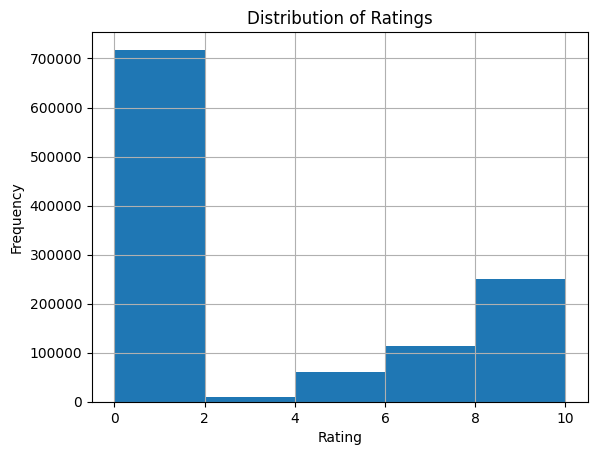

In [ ]:
rating['Book-Rating'].hist(bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()